# Predicting Heart Disease

**By: Winnie Chang, Yuhan Gao, William Shi, and John Wang**

## Introduction:

Heart disease is a serious illness that requires early intervention to prevent. Being able to predict whether a patient will suffer from heart disease could be the key to saving their life. Luckily, certain biological features can be early indications of later heart disease. These biological features can be used to train classification models to predict whether a new patient is likely to suffer from heart disease later on in life.


### The Dataset
The [dataset](https://www.kaggle.com/sumaiyatasmeem/heart-disease-classification-dataset) we use includes a set of 13 biological features linked to heart disease. The features are (paraphrased directly from the dataset description):
1. **age** : in whole years
2. **sex** : male or female
3. Chest-pain Type [**cp**] : 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptotic
4. Resting Blood Pressure [**trestbps**]: the resting blood pressure value of an individual in mmHg (anything above 130-140 is typically cause for concern)
5. Serum Cholestrol [**chol**] : the serum cholesterol in mg/dl
6. Fasting Blood Sugar [**fbs**] : 1 if fasting blood sugar > 120mg/dl (a signal for diabetes), 0 if fbs <= 120mg/dl
7. Resting ECG [**restecg**] : 0 = normal, 1 = having ST-T wave abnormality, 2 = left ventricular hyperthrophy
8. Max heart rate achieved [**thalach**] : the max heart rate achieved by an individual
9. Exercise induced angina [**exang**] : 1 = yes, 0 = no
10. ST depression induced by exercise relative to rest [**oldpeak**]: a value which is an integer or float.
11. Slope of the peak exercise ST segment [**slope**] : 0 = upsloping (better heart rate with excercise (uncommon)), 1 = flat (minimal change (typical healthy heart)), 2 = downsloping (signs of unhealthy heart)
12. Number of major vessels (0–3) colored by flourosopy [**ca**] : a value as integer or float
13. Displays the thalassemia [**thal**] : 1,3 = normal, 6 = fixed defect, 7 = reversible defect (no proper blood movement when excercising)

The dataset includes a **target** column that indicated whether the patient in the record is suffering from heart disease: 1 = yes and 0 = no.


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

First we read in the dataset. We drop the **id** column because it does not help with data analysis and we do not want to train on ids.

In [2]:
# Read CSV file into DataFrame df
heart_data = pd.read_csv('heart disease classification dataset.csv')
heart_data.drop(columns='id', axis=1, inplace=True)

# Show dataframe
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


Before performing data cleaning, we separate our data into data and label.

In [3]:
data_Y = heart_data['target']
data_X = heart_data.drop(['target'],axis=1)

data_X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2


### Data Cleaning and Feature Engineering

We fill any null values with an appropriate value and convert categorical values into continuous values.

In [4]:
# check for any null values in cols
data_X.isna().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

Doing a quick survey of the dataset shows that **trestbps**, **chol**, and **thalach** in some records are null. Since these three features are continuous features, we decided to replace the null values with the overall mean of each feature.

For **sex**, we replaced that column with one-hot encodings: one column for male and one column for female, where 1 = True and 0 = False.

In [5]:
# replace w/ mean of col
for col in data_X:
    if col != 'sex':
        data_X[col].fillna(data_X[col].mean(), inplace=True)
    if col == 'sex':
        counts = data_X[col].value_counts().index.tolist()
        data_X[col].fillna(counts[0],inplace=True)
        
#male is 0 and female is 1       
data_X = pd.get_dummies(data_X, columns= ["sex"], prefix = ["sex"])
data_X.head()  


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_female,sex_male
0,63,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,0,1
1,37,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,0,1
2,41,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,1,0
3,56,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,0,1
4,57,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,1,0


### Data Exploration

In [6]:
#data exploration
data_X.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_female,sex_male
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531,0.316832,0.683168
std,9.082101,1.032052,17.511894,51.822273,0.356198,0.525860,22.376122,0.469794,1.161075,0.616226,1.022606,0.612277,0.466011,0.466011
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>],
       [<AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>,
        <AxesSubplot:title={'center':'thal'}>],
       [<AxesSubplot:title={'center':'sex_female'}>,
        <AxesSubplot:title={'center':'sex_male'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

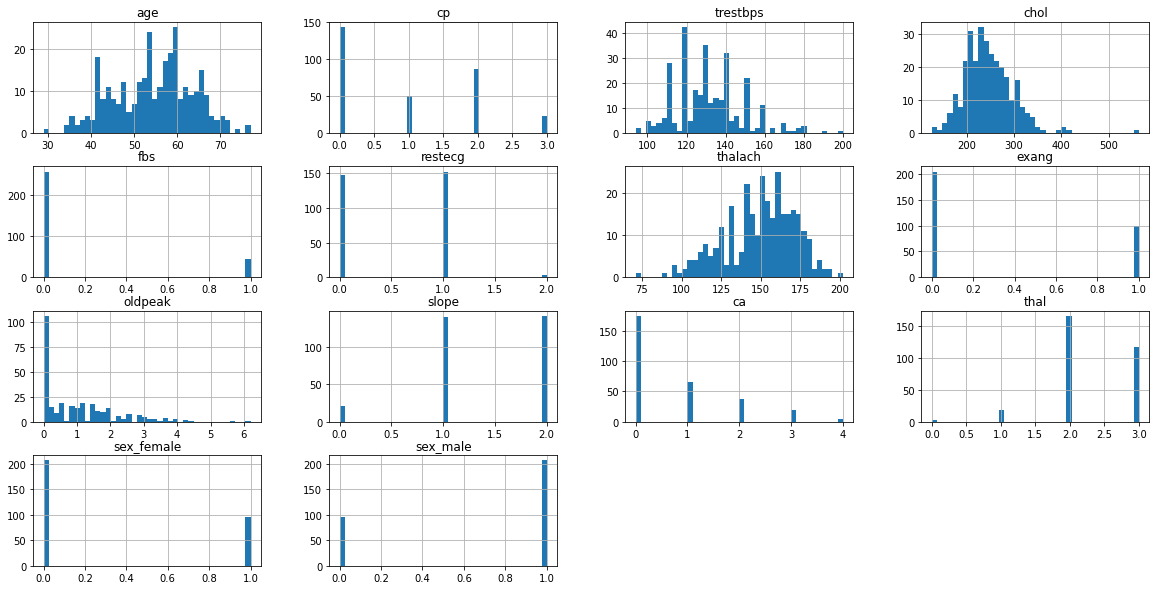

In [7]:
data_X.hist(bins=40, figsize=(20,10))

<AxesSubplot:xlabel='age', ylabel='trestbps'>

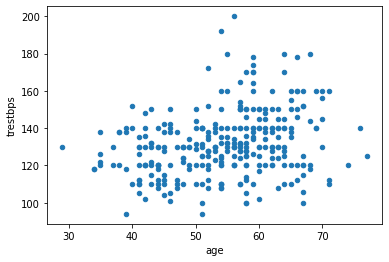

In [8]:
data_X.plot.scatter(x='age', y='trestbps')

<AxesSubplot:xlabel='age', ylabel='thalach'>

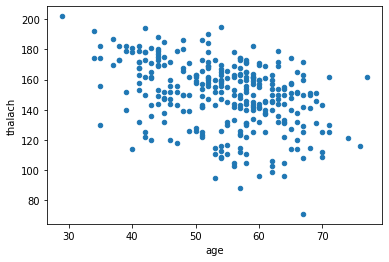

In [9]:
data_X.plot.scatter(x='age', y='thalach')

People who are 50-60 years old tend to have a high max heart rate

### Data Analysis

#### Decision Tree Classifier

For our Decision Tree classifier, we split our data set into 20% test set and 80% training set. We do an initial Decision Tree classifier using entropy as the split criterion.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

print("Features shape", data_X.shape)
print("Labels shape", data_Y.shape)
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.20)

print("X_train set size =",X_train.shape, "\ty_train set size =", y_train.shape)
print("X_test set size =",X_test.shape, "\ty_test set size =", y_test.shape)

clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print('Accuracy on test data is:', (accuracy_score(y_test, preds)))

Features shape (303, 14)
Labels shape (303,)
X_train set size = (242, 14) 	y_train set size = (242,)
X_test set size = (61, 14) 	y_test set size = (61,)
Accuracy on test data is: 0.7704918032786885


In the next cells, we tried different Decision Tree classifier parameters such as max_depth and min_sample_leaf. We also tried gini as the split criterion.

In [11]:
# max_depth
clf1 = DecisionTreeClassifier(criterion='entropy',max_depth=4)
clf1 = clf1.fit(X_train, y_train)
preds1 = clf1.predict(X_test)
print('Accuracy on test data is:', (accuracy_score(y_test, preds1)))

Accuracy on test data is: 0.7868852459016393


In [12]:
# min_samples_split
clf2 = DecisionTreeClassifier(criterion='entropy',min_samples_split=5)
clf2 = clf2.fit(X_train, y_train)
preds2 = clf2.predict(X_test)
print('Accuracy on test data is:', (accuracy_score(y_test, preds2)))

Accuracy on test data is: 0.7377049180327869


In [13]:
# min_sample_leaf
clf3 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=2)
clf3 = clf3.fit(X_train, y_train)
preds3 = clf3.predict(X_test)
print('Accuracy on test data is:', (accuracy_score(y_test, preds3)))

Accuracy on test data is: 0.7213114754098361


In [14]:
# min_impurtity_decrease
clf4 = DecisionTreeClassifier(criterion='entropy',min_impurity_decrease=3)
clf4 = clf4.fit(X_train, y_train)
preds4 = clf4.predict(X_test)
print('Accuracy on test data is:', (accuracy_score(y_test, preds4)))

Accuracy on test data is: 0.5737704918032787


In [15]:
# gini
clf5 = DecisionTreeClassifier(criterion='gini')
clf5 = clf5.fit(X_train, y_train)
preds5 = clf5.predict(X_test)
print('Accuracy on test data is:', (accuracy_score(y_test, preds5)))

Accuracy on test data is: 0.7049180327868853


Now we perform cross_validation with cv=10 on the model with the only parameter of entropy as the split criterion.

In [16]:
# cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, data_X, data_Y, cv=10) 
print("Scores:", scores)                                            

print("Average accuracy:", scores.mean()*100)

Scores: [0.80645161 0.80645161 0.87096774 0.8        0.83333333 0.8
 0.56666667 0.83333333 0.66666667 0.76666667]
Average accuracy: 77.50537634408602


In [17]:
# Nested Cross Validation
from sklearn.model_selection import GridSearchCV

params = {"max_depth": [5, 10 , 15, 20 ] , 
         "min_samples_leaf": [5, 10, 15, 20],
         "max_features" : [5,10,14]}

grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')

grid_search.fit(data_X, data_Y)

print(grid_search.best_params_)
#best 'max_depth': 14, 'max_features': 10, 'min_samples_leaf': 11
#Accuracy: 83.80874316939891
print("Accuracy:", grid_search.best_score_*100)

{'max_depth': 5, 'max_features': 14, 'min_samples_leaf': 15}
Accuracy: 82.15846994535518


In [18]:
# Offical accuracy
nested_score = cross_val_score(grid_search, data_X, data_Y, cv=5)
#best result is 80
print("Accuracy:", nested_score.mean()*100)

Accuracy: 81.1639344262295


#### K-Nearest Neighbors Classifier

Here we tried to use the K-Nearest Neighbor classifier. First we need to scale our data.
We may want to perform a dimensionality reduction with PCA before running KNN. PCA should only be performed on scaled data!

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


scaler = StandardScaler()
pca = PCA()
neigh = KNeighborsClassifier(n_neighbors=7)
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('knn', neigh)])
score = cross_val_score(pipe, data_X, data_Y, cv=5)
print("Accuracy:", score.mean()*100)

Accuracy: 82.15846994535518


We can use nested cross validation to choose the best number of neighbors and the best number of dimensions to project down onto using PCA.

In [20]:
import warnings
warnings.filterwarnings('ignore')
'''
On the "pca" part of the pipeline, 
tune the n_components parameter,
by trying the values 5-14.

On the "knn" part of the pipeline, 
tune the n_neighbors parameter,
by trying the values 1-25.
'''

param_grid = {
    'pca__n_components': list(range(5, 14)),
    'knn__n_neighbors': list(range(1, 26))
}



knn_grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

knn_grid_search.fit(data_X, data_Y)

print(knn_grid_search.best_params_)

print("Accuracy:", knn_grid_search.best_score_*100)

{'knn__n_neighbors': 6, 'pca__n_components': 12}
Accuracy: 84.8032786885246


We did not hold out a test set. The accuracy reported out is on the _validation_ set. So now we need to wrap the whole process in another cross-validation to perform a nested cross-validation and report the accuarcy of this KNN model on unseen test data. This is the official accuracy we would report on this model.

In [21]:
knn_nested_score = cross_val_score(knn_grid_search, data_X, data_Y, cv=5)

print("Accuracy:", knn_nested_score.mean()*100)

Accuracy: 80.53005464480873


#### Naive Bayes Classifier

For our Naive Bayes classifier, we went with a Gaussian distribution.

In [22]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(data_X, data_Y)
nb_score = cross_val_score(clf, data_X, data_Y, cv=10)
print("Accuracy:", nb_score.mean()*100)

Accuracy: 82.49462365591398


We use classification_report for evaluating the classifier on a per-class basis. It is a summary of the precision, recall, and F1 score for each class

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

y_pred = cross_val_predict(clf, data_X, data_Y, cv=5)
print(confusion_matrix(data_Y, y_pred))
print(classification_report(data_Y, y_pred))

[[110  28]
 [ 26 139]]
              precision    recall  f1-score   support

          no       0.81      0.80      0.80       138
         yes       0.83      0.84      0.84       165

    accuracy                           0.82       303
   macro avg       0.82      0.82      0.82       303
weighted avg       0.82      0.82      0.82       303



#### Support Vector Machine (SVM) Classifier
We created a pipeline that includes StandardScaler, PCA and SVC. We tried parameters with the number of dimensions from 5 to 14 and SVM kernels linear, rbf and poly. Our model was evaluated using a 10-fold cross validation with 5-fold GridSearch. Finally we print out the accuracy and classification report.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict

svm_scaler = StandardScaler()
svm_pca = PCA()
svc = SVC()
svm_pipeline = Pipeline([('scaler', svm_scaler), ('pca', svm_pca), ('svc', svc)])

param_grid = {
    'pca__n_components': list(range(5, 14)),
    'svc__kernel': ['linear', 'rbf', 'poly'],
}

svm_gscv = GridSearchCV(svm_pipeline, param_grid, cv=5)
svm_cv = cross_val_predict(svm_gscv, data_X, data_Y, cv=10)
print("Accuracy:", accuracy_score(data_Y, svm_cv))
print("Classification report:\n", classification_report(data_Y, svm_cv))

Accuracy: 0.8151815181518152
Classification report:
               precision    recall  f1-score   support

          no       0.83      0.75      0.79       138
         yes       0.81      0.87      0.84       165

    accuracy                           0.82       303
   macro avg       0.82      0.81      0.81       303
weighted avg       0.82      0.82      0.81       303



#### Ensemble Classifiers
##### Random Forest Classifiers
We use RandomForestClassifier to classify the data. We used GridSearchCV with a 5-fold CV and tried diffierent hyperparameters for max_depth, min_samples_leaf and max_features to get the best results. Finally, we calculated the accuracy of the model using cross validation with 5-fold CV.

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [5, 10, 15, 20],
    'max_features' : ['sqrt', 'log2']
}
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
nested_score = cross_val_score(grid_search, data_X, data_Y, cv=5)
print("Accuracy:", nested_score.mean()*100)

Accuracy: 83.49726775956285


##### ADA Boost
We evaluate the model by using Ada boost classifier. We use 150 base classifiers and evaluate the accracy with 5-fold cross validation.

In [26]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=150)
score = cross_val_score(clf, data_X, data_Y, cv=5)
print("Accuracy:", score.mean()*100)

Accuracy: 77.19125683060109


### Conclusion

After we applied different model to predict our data, we found that the k-nearest neighbor worked the best. We think that the patients who have similar biological features would cluster together, so the patient is more likely to have heart disease if their nearest neighbors also have heart disease.

We expected ensemble classifiers would provide better accuracy but to our surprise, we found that the random forest classifier performed roughly the same as a singular decision tree classifier and that ADA Boost performed worse than most of the tested models.